Scaling and Clustering of the spotify library:

In [1]:
import scalingclustering
from scalingclustering import load_playlist_pkl, kmeans_missing,\
yellowbricking, plot_clusters, apply_scaler, apply_kmeans, predict_kmeans, elbowing, silhouetting, save_pkl, load_pkl
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans


In [2]:

sp_library = load_playlist_pkl(path = 'Playlists')

In [3]:
sp_library.shape

(29707, 19)

In [4]:
pl_dict = {}
i = 0
for index in sp_library['playlistID'].value_counts().index:
    pl_dict[index] = i
    i += 1

In [5]:
for pl_id in sp_library['playlistID']:
    sp_library['playlistnr'] = pl_dict[pl_id]
   

In [6]:
sp_library['Year'] = pd.to_datetime(sp_library['ReleaseYear'], errors = 'coerce', format='%Y-%m-%d')
sp_library['Year'] = pd.DatetimeIndex(sp_library['Year']).year

Columns for clustering:
'danceability'
'energy'
'loudness'
'speechiness'  # detects the presence of spoken words in a track
'acousticness'
'instrumentalness'
'liveness'  # Detects the presence of an audience in the recording
'valence'  # A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track
'tempo'


Add later when data exists:
'time_signature'
'popularity'

In [7]:
X = sp_library[['danceability',
                'energy',
                'loudness',
                'speechiness',
                'acousticness',
               'instrumentalness',
               'liveness', 
                'valence',  
                'tempo',
                'Year',
                'Popularity']]

In [8]:
X_scaled_df, scaler = apply_scaler(X)
save_pkl(scaler, filename = "model/scalerKmeans.pickle")
save_pkl(X_scaled_df, filename = "model/X_scaled_df.pickle")

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Year,Popularity
0,0.601,0.532,-9.119,0.0286,0.432,0.000006,0.0925,0.341,136.571,1972.0,79.0
1,0.484,0.508,-9.308,0.0364,0.376,0.000791,0.0961,0.554,151.867,1970.0,2.0
2,0.576,0.432,-13.642,0.0314,0.233,0.00135,0.0743,0.348,132.144,1995.0,60.0
3,0.579,0.508,-9.484,0.027,0.00574,0.000494,0.0575,0.609,147.125,2003.0,56.0
4,0.326,0.872,-7.602,0.122,0.214,0,0.461,0.492,173.381,1977.0,69.0


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Year,Popularity
0,-0.112132,-0.491688,-0.071973,-0.613048,0.585282,-0.516496,-0.564537,-0.797569,0.573511,-1.846173,1.473719
1,-0.828481,-0.598479,-0.110790,-0.505626,0.391998,-0.514032,-0.540246,0.008465,1.121351,-1.959229,-1.728849
2,-0.265198,-0.936653,-1.000924,-0.574486,-0.101567,-0.512276,-0.687344,-0.771080,0.414954,-0.546023,0.683475
3,-0.246830,-0.598479,-0.146938,-0.635083,-0.885955,-0.514965,-0.800705,0.216596,0.951512,-0.093796,0.517108
4,-1.795858,1.021196,0.239595,0.673266,-0.167145,-0.516516,1.921968,-0.226155,1.891894,-1.563531,1.057801


We chose the number of 8 clusters.

In [9]:
n_clusters = 8 

In [10]:

labels, centroids, X_hat, n_clusters, max_iter = kmeans_missing('model/X_scaled_df.pickle', n_clusters= 10, max_iter=50 )
kmeans = apply_kmeans(pd.DataFrame(X_hat), n_clusters)
save_pkl(max_iter, filename = 'model/max_iter.pickle')
save_pkl(n_clusters, filename = 'model/n_clusters.pickle')
save_pkl(centroids, filename = 'model/centroids.pickle')
save_pkl(labels, filename = 'model/labels.pickle')
save_pkl(X_hat, filename = 'model/X_hat.pickle')


/Users/christoph/opt/anaconda3/envs/DA_Env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/Users/christoph/opt/anaconda3/envs/DA_Env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/Users/christoph/opt/anaconda3/envs/DA_Env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/Users/christoph/opt/anaconda3/envs/DA_Env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/Users/christoph/opt/anacond

In [11]:
#labels, clusters = predict_kmeans(X_hat, X, centroids)
#plot_clusters(centroids, X, labels)

In [12]:
n_clusters, X_hat, labels

(10,
 array([[-0.11213227, -0.49168771, -0.07197267, ...,  0.57351086,
         -1.84617284,  1.47371909],
        [-0.82848111, -0.59847949, -0.11079022, ...,  1.12135091,
         -1.95922939, -1.72884913],
        [-0.26519826, -0.93665345, -1.00092376, ...,  0.41495385,
         -0.54602255,  0.68347499],
        ...,
        [-2.21832031,  0.71416946,  1.00280094, ...,  1.08378002,
         -1.05477701, -1.81203272],
        [-1.52033939,  0.51393488,  0.63454772, ..., -1.53106741,
         -1.39394665,  0.93302576],
        [-1.01828294,  1.53290643,  0.87977602, ...,  0.10693709,
         -0.99824874,  1.14098473]]),
 array([9, 5, 8, ..., 3, 9, 3], dtype=int32))

In [13]:
#clusters
pd.Series(labels).value_counts().sort_index()

0    2090
1    6309
2    1349
3    3197
4    1448
5    3686
6    1727
7    1552
8    3194
9    5155
dtype: int64

In [14]:
#X_df = pd.DataFrame(X)
#X_hat["label"] = labels
sp_library['label'] = labels

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



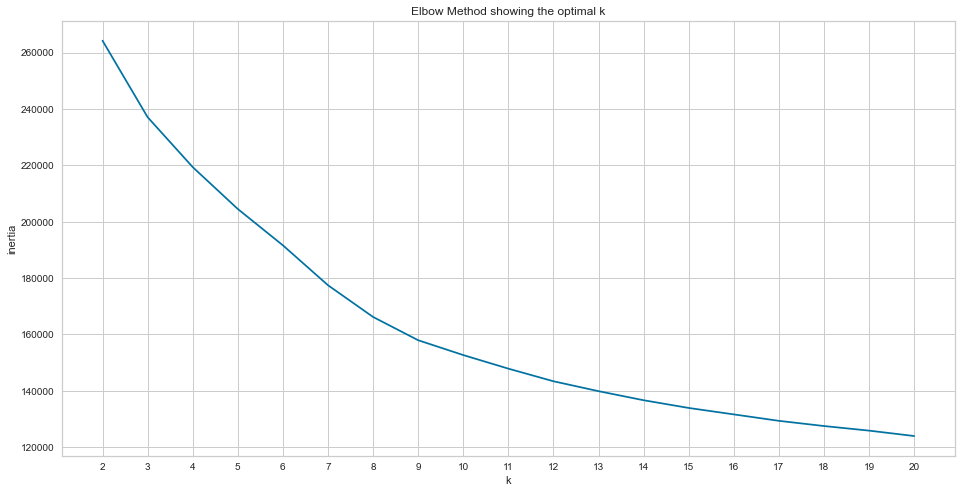

In [15]:
elbowing(path = 'model/X_hat.pickle')

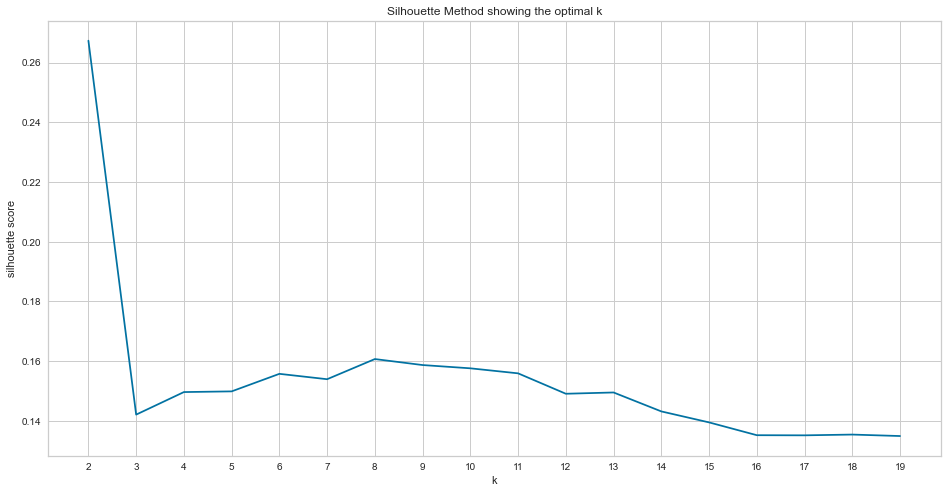

In [16]:
silhouetting(path='model/X_hat.pickle')

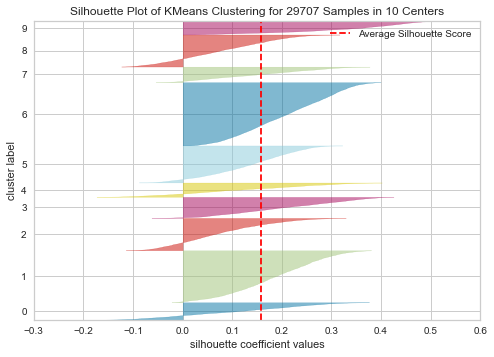

In [17]:
yellowbricking('model/X_hat.pickle', n_clusters)

In [19]:
#save_pkl(X, 'model/X.pickle')
#save_pkl(X_scaled_df, 'model/X_hat.pickle')
save_pkl(sp_library, ('model/sp_library.pickle'))
save_pkl(kmeans, filename = 'model/kmeans.pickle')
